ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
2579    yellow
2580    yellow
2581    yellow
2582    yellow
2583    yellow
Name: class, Length: 2584, dtype: object

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

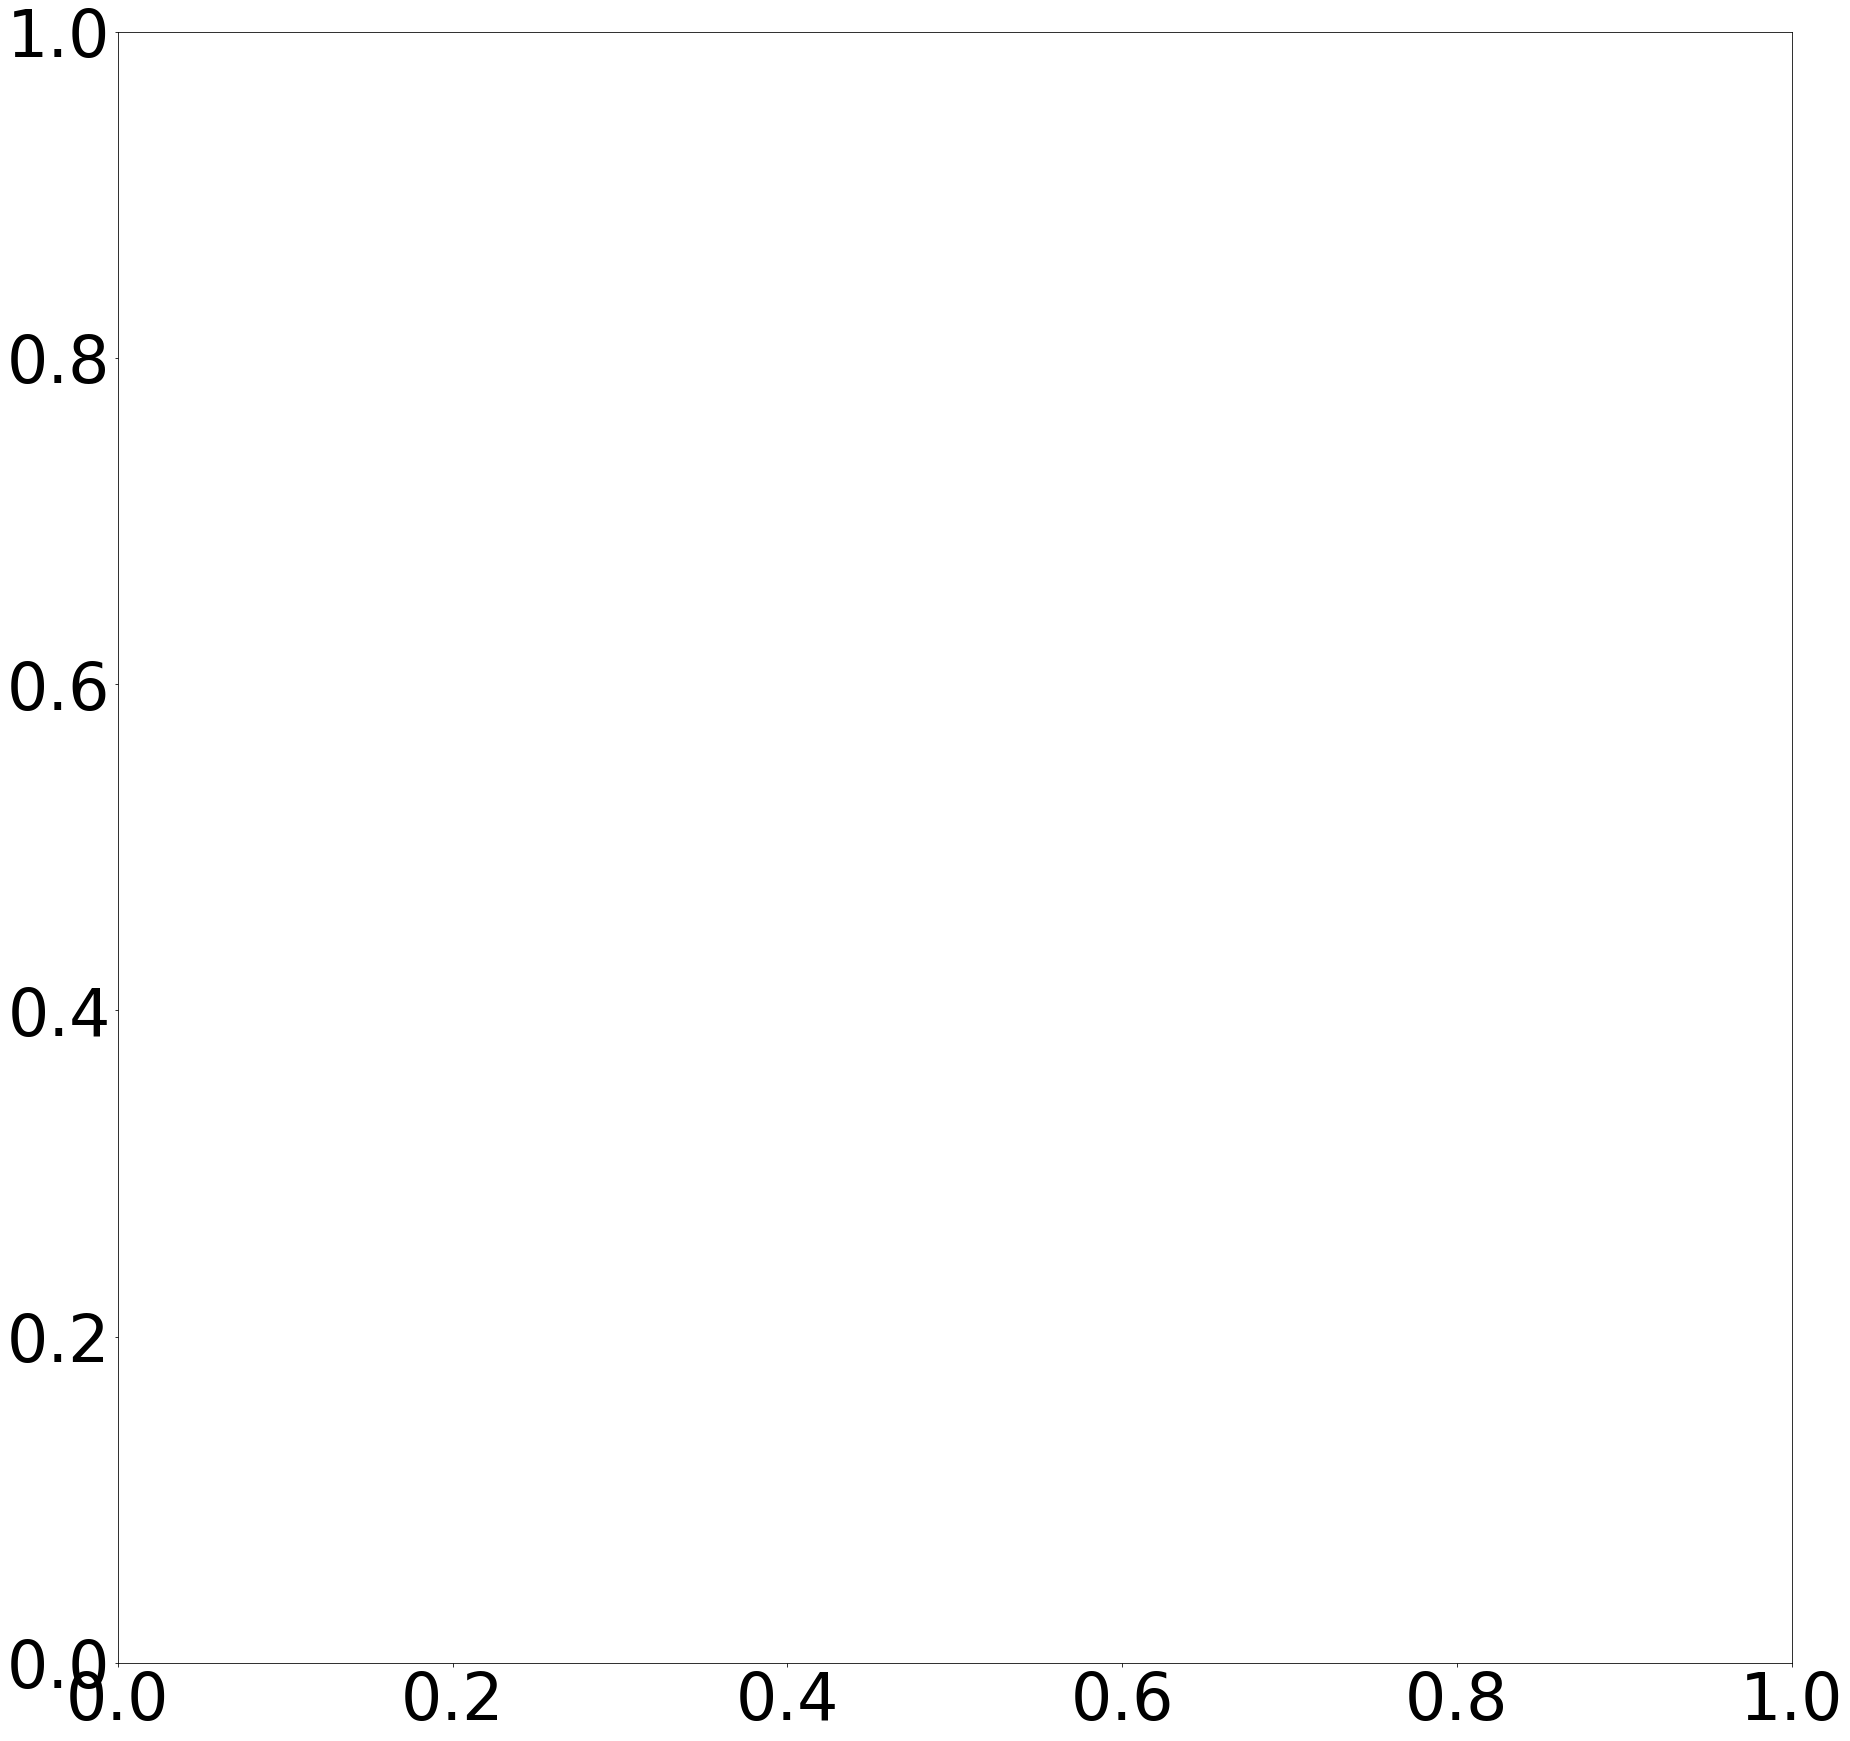

In [3]:
from codes.rudi import *
import matplotlib.pyplot as plt
import shutil

file_name = 'keat'
path_name = './random_keat_nC/'
plot_path = path_name + 'plot_file/'
csv_path = path_name + 'csv_file/'
if os.path.isdir(path_name):
    shutil.rmtree(path_name)
    os.makedirs(path_name)
    os.makedirs(plot_path)
    os.makedirs(csv_path)
else:
    os.makedirs(path_name)
    os.makedirs(plot_path)
    os.makedirs(csv_path)

df_keat_intial = pd.read_csv('./keat.csv')
df_keat_main = repeating_drop(df_keat_intial)
df_keat_main.reset_index(inplace=True, drop=True)
df_keat = df_keat_main
# df_keat.drop(['Total'], axis=1, inplace=True)
df_dup_keat = df_keat[df_keat.duplicated(subset=['Sequence'], keep=False)]
df_keat.drop_duplicates(subset=['Sequence'], inplace=True)

print('dataset name: keat-Without Cysteine', file=open(path_name + file_name + '_report.txt', 'w'))

print("number of the sequences: {}".format(len(df_keat['Sequence'])),
      file=open(path_name + file_name + '_report.txt', 'a'))

print("number of the duplicate: {}".format(len(df_dup_keat) / 2),
      file=open(path_name + file_name + '_report.txt', 'a'))
#
amino_list = list('ACDEFGHIKLMNPQRSTVWY')
amino_appear = amino_used(df_keat)

print("number of amino acid occurrence along the dataset:\n\n",
      amino_occurrence(df_keat, amino_list).to_markdown(),
      file=open(path_name + file_name + '_report.txt', 'a'))

low_kd_value = ['DSTG', 'DVTG']
high_kd_value = ['QSPG']
pattern_all = pattern_detection(df_keat, path_name + file_name + '_pattern_report.csv')

for i in range(10):
    df_keat_tmp = random_sequence(df_keat, amino_appear, len(df_keat['Sequence'][0]), len(df_keat),
                                  path_name + 'random_seq_random_keat_' + str(i + 1) + '.csv')

    encoded_keat_tmp = encoding(df_keat_tmp, amino_used(df_keat_tmp))

    df_keat_tmp_pca = df_keat_tmp.copy()
    pca_keat_tmp = pca_pep(df_keat_tmp_pca, encoded_keat_tmp)[1]

    df_keat_tmp_t_sne = df_keat_tmp.copy()
    t_sne_keat_tmp = t_sne_pep(df_keat_tmp_t_sne, encoded_keat_tmp)[1]
    label_list_without_pattern = ('random', 'keat1')
    size_list = [400] * len(label_list_without_pattern)
    
    sav_fig(pca_keat_tmp, label_list_without_pattern, 'PCA of Peptide Sequence without pattern', 'pca_1', 'pca_2',
            path_name + 'pca_keat_random_' + str(i + 1) + '_without_pattern.png'
           ,size_list,'class')

    pca_keat_tmp.to_csv(
        path_name + 'random_seq_random_keat_' + str(i + 1) + '_pca.csv',
        index=False)
    
    size_list = [400] * len(label_list_without_pattern)
    sav_fig(t_sne_keat_tmp, label_list_without_pattern, 't_SNE of Peptide Sequence without pattern', 't_SNE_1',
            't_SNE_2', path_name + 't_sne_keat_random_' + str(i + 1) + '_without_pattern.png'
            ,size_list,'class')
    t_sne_keat_tmp.to_csv(
        path_name + 'random_seq_random_keat_' + str(i + 1) + '_t_SNE.csv',
        index=False)

    for pattern_list in pattern_all:
        for single_pattern in pattern_list:
#             label_list = ('random', 'keat1', single_pattern, 'Low Kd', 'High Kd')
            df_tmp_t_sne = locate_sequence(t_sne_keat_tmp, single_pattern, low_kd_value, high_kd_value)
            df_tmp_t_sne.to_csv(
                csv_path + 'pattern_' + single_pattern + '_random_seq_random_keat_' + str(i + 1) + '_t_SNE.csv',
                index=False)
            label_list = list(np.unique(df_tmp_t_sne['class'].to_numpy()))
            size_list = [400] * len(label_list)
            sav_fig(df_tmp_t_sne, label_list,
                    'pat' + 'pattern_' + single_pattern + '_random_seq_random_keat_' + str(i + 1) + '_t_SNE',
                    't_SNE_1', 't_SNE_2',
                    plot_path + 'pattern_' + single_pattern + '_random_seq_random_keat_' + str(i + 1) + '_t_SNE.png'
                   ,size_list,'class'
                   )

            df_tmp_pca = locate_sequence(pca_keat_tmp, single_pattern, low_kd_value, high_kd_value)
            df_tmp_pca.to_csv(
                csv_path + 'pattern_' + single_pattern + '_random_seq_random_keat_' + str(i + 1) + '_pca.csv',
                index=False)
            label_list = list(np.unique(df_tmp_pca['class'].to_numpy()))
            size_list = [400] * len(label_list)

            sav_fig(df_tmp_pca, label_list,
                    'pattern_' + single_pattern + '_random_seq_random_keat_' + str(i + 1) + '_pca',
                    'pca_1', 'pca_2',
                    plot_path + 'pattern_' + single_pattern + '_random_seq_random_keat_' + str(i + 1) + '_pca.png'
                   ,size_list,'class'
                   )

            plt.figure().clear()
            plt.close()
            plt.cla()
            plt.clf()

    svm_pep(df_keat_tmp, amino_appear, path_name, 'keat_random_seq_' + str(i + 1))

gather_data(path_name, path_name + file_name + '_final_result.csv')
